#  Assignment : Lending Case Study

This Case study is w.r.t the assignment given to us for the EDA module

## 1. **Harshali Bhoyar**
## 2. **Rupesh Kumar Shukla**


# Objective 

Right lending decisions based on the likelihood of :
1. Applicants likely to default (Reduce credit loss)
2. Creditworthy applicants (Increased business opportunities)


# Benefits to the Company

1. Reduced loss by identifying applicants likely to default 
2. Improved Risk Assessment
3. Adjusted loans, interest rates based on risk factors
4. Informed decision for loan approval
5. Improved loan lending strategy
6. Industry leadership and competitive advantage


# Step 1 : Import Relevant Libraries and CSV file

In [1]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the CSV file.
#"loan" is the original df
#"loan_df" is the df where we need to do all the cleaning

loan = pd.read_csv("loan.csv")
loan_df = loan.copy()
loan_df.head()

C:\Users\21985\AppData\Local\Temp\ipykernel_25860\1876475054.py:5: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv("loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


# Step 2 : Data Cleaning

## 2.1 Columns with missing values

We need to remove all the columns where missing values is greater than 90 percentage to ensure that the data is minimal and is relevant.
It will ensure the following :

1. EDA won't be affected due to incomplete information.
2. Lesser features to work on.
3. More focused features to work

In [4]:
na_values_grtr_90 = loan_df.isna().mean()*100
na_values_grtr_90
columns_to_drop = na_values_grtr_90[na_values_grtr_90 > 90.0]

#The below print command will give the columns with missing percentage > 90
print("Columns with missing percentage > 90 : \n", columns_to_drop,"\n")

#The below code gives the columns that needs to be dropped.
print("Columns to drop : \n", columns_to_drop.index,"\n")

#The below code drops the column with missing values > 90
loan_df.drop(columns=columns_to_drop.index, inplace=True)

Columns with missing percentage > 90 : 
 mths_since_last_record             92.985372
next_pymnt_d                       97.129693
mths_since_last_major_derog       100.000000
annual_inc_joint                  100.000000
dti_joint                         100.000000
verification_status_joint         100.000000
tot_coll_amt                      100.000000
tot_cur_bal                       100.000000
open_acc_6m                       100.000000
open_il_6m                        100.000000
open_il_12m                       100.000000
open_il_24m                       100.000000
mths_since_rcnt_il                100.000000
total_bal_il                      100.000000
il_util                           100.000000
open_rv_12m                       100.000000
open_rv_24m                       100.000000
max_bal_bc                        100.000000
all_util                          100.000000
total_rev_hi_lim                  100.000000
inq_fi                            100.000000
total_cu_tl   

### 2.1.1 Columns to drop
1. We identified columns with missing value percentage > 90%.
2. We dropped those columns as they won't give any specific analysis.
3. 55 Columns remain after dropping the columns with Null values with missing percentage > 90%
4. This makes our data more manageable

In [5]:
#We have total 39717 Rows and 55 Columns

loan_df.shape


(39717, 55)

In [6]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


### 2.1.2 Filter Loan Status which are Fully Paid or charged off is the data of our interest

We need to focus on the customers who have fully paid the loan or have been charged off. This will ensure the following:
1. We get to know the repayment status, late fee status, etc. from the filtered data set
2. Closed loan can give us the pattern of customer behaviour
3. Narrow down the approach to the closed loan as the future pattern is difficult to analyze for an on-going loan

In [7]:
#Filter out the data set with loan status not equal to current, which will give us the data of our interest
loan_df = loan_df[loan_df["loan_status"]!='Current']
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   member_id                   38577 non-null  int64  
 2   loan_amnt                   38577 non-null  int64  
 3   funded_amnt                 38577 non-null  int64  
 4   funded_amnt_inv             38577 non-null  float64
 5   term                        38577 non-null  object 
 6   int_rate                    38577 non-null  object 
 7   installment                 38577 non-null  float64
 8   grade                       38577 non-null  object 
 9   sub_grade                   38577 non-null  object 
 10  emp_title                   36191 non-null  object 
 11  emp_length                  37544 non-null  object 
 12  home_ownership              38577 non-null  object 
 13  annual_inc                  385

### 2.1.3 Analyze the object type categorical columns to identify the unique values.

It is necessary to identify the number of unqiue values in a column. This will ensure the following:
1. Any categorical data with single values won't give us any analytical info
2. Any categorical data with huge number of values will be difficult to analyze
3. Any continous data with very less unique values tend to lack analytical information.

Such columns can be idnetified and can be dropped from the dataset to make the analysis lot easier

In [8]:
loan_df.nunique().sort_values(ascending=True)

tax_liens                         1
initial_list_status               1
out_prncp                         1
out_prncp_inv                     1
collections_12_mths_ex_med        1
policy_code                       1
pymnt_plan                        1
application_type                  1
acc_now_delinq                    1
chargeoff_within_12_mths          1
delinq_amnt                       1
loan_status                       2
term                              2
verification_status               3
pub_rec_bankruptcies              3
home_ownership                    5
pub_rec                           5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq      

### 2.1.4 Columns with least signifiance

Following data has just single unqiue value and won't provide any analytical advantage. Thus can be dropped.

1. tax_liens
2. initial_list_status
3. out_prncp
4. out_prncp_inv
5. collections_12_mths_ex_med
6. policy_code
7. pymnt_plan
8. application_type
9. acc_now_delinq
10. chargeoff_within_12_mths
11. delinq_amnt

Other columns that can be dropped due to least significance
1. id = This is not required as it is just for unique identification
2. member_id =  This is not required as it is just for unique identification
3. url = This is not required as urls are unique
4. desc = This is a text column and cleaning will be a difficult task. Purpose column to be used instead
5. zip_code = The zipcode is incomplete. It doesn't give any significant understanding. 
6. emp_title = Lots of unique data. Significant categorical analysis won't happen
7. title = This column can be dropped as it has lots of values, thus cannot be used a categorical data


In [9]:
least_signi_col = ['id','member_id','url','desc','zip_code','initial_list_status','pymnt_plan','emp_title','application_type','tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'policy_code', 'collections_12_mths_ex_med', 'out_prncp', 'out_prncp_inv','title']
loan_df.drop(least_signi_col, axis=1, inplace=True)
loan_df.shape

(38577, 37)

In [10]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                38577 non-null  int64  
 1   funded_amnt              38577 non-null  int64  
 2   funded_amnt_inv          38577 non-null  float64
 3   term                     38577 non-null  object 
 4   int_rate                 38577 non-null  object 
 5   installment              38577 non-null  float64
 6   grade                    38577 non-null  object 
 7   sub_grade                38577 non-null  object 
 8   emp_length               37544 non-null  object 
 9   home_ownership           38577 non-null  object 
 10  annual_inc               38577 non-null  float64
 11  verification_status      38577 non-null  object 
 12  issue_d                  38577 non-null  object 
 13  loan_status              38577 non-null  object 
 14  purpose               

### 2.1.5 Identify columns that are highly co-related.
1. We have chosen columns like loan_amnt, funded_amnt etc., as these columns represent a similar aspect
2. If 1 or more columns are highly co-related then, we can take only 1 column into consideration 
3. Reduce data analysis redundancy

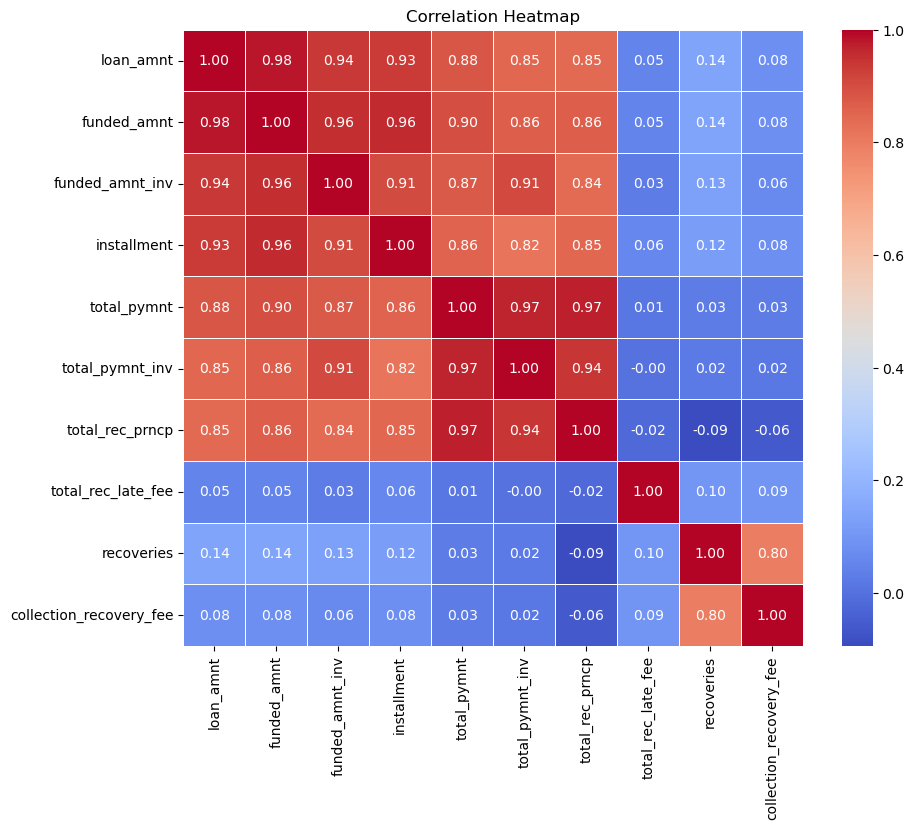

In [11]:
correlated_columns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment','total_pymnt', 'total_pymnt_inv', 'total_rec_prncp','total_rec_late_fee', 'recoveries', 'collection_recovery_fee']
correlation_matrix = loan_df[correlated_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


#### From the heatmap we can see that the above columns are highly co-related. Thus, we can consider any one of the column and the same result can be applied on other parameters also

We can drop all the correalted columns. I am keeping 'loan_amnt' and 'recoveries' columns.
1. total_pymnt_inv
2. funded_amnt
3. funded_amnt_inv
4. installment pymnt_plan
5. total_pymnt
6. total_rec_prncp
7. collection_recovery_fee

In [12]:
correlated_columns_to_drop = ['total_pymnt_inv', 'funded_amnt', 'funded_amnt_inv', 'installment', 'total_pymnt', 'total_rec_prncp','collection_recovery_fee']
loan_df.drop(columns=correlated_columns_to_drop, inplace=True)

In [13]:
loan_df.shape

(38577, 30)

### We have dropped total of 81 Columns and only 30 columns of interest remain as of now. We'll do further analysis on the columns which needs to be cleaned.

## 2.2 Column cleaning and data formatting

#### After dropping the least significant columns, we can do the cleaning of the data where special characters like "%" are present. This will help the columns to be treated as a quantifiable data. Also, we can convert all the date columns into the date data type.

In [14]:
#loan_df_dcol is the data set that is created after dropping all the relevant data 

loan_df_dcol = loan_df.copy()

df_issue_d = loan['issue_d'].str.partition("-", True)
loan['issue_month']=df_issue_d[0]
loan['issue_year']='20' + df_issue_d[2]
loan_df['issue_month']=df_issue_d[0]
loan_df['issue_year']='20' + df_issue_d[2]

loan_df['revol_util'] = loan_df_dcol['revol_util'].str.rstrip('%').astype(float)
loan_df['int_rate'] = loan_df_dcol['int_rate'].str.rstrip('%').astype(float)
loan_df['term'] = loan_df_dcol['term'].str.rstrip('months').astype(int)
loan_df['issue_d'] = pd.to_datetime(loan_df_dcol['issue_d'], format='%b-%y')
loan_df['last_pymnt_d'] = pd.to_datetime(loan_df_dcol['last_pymnt_d'], format='%b-%y')
loan_df['last_credit_pull_d'] = pd.to_datetime(loan_df_dcol['last_credit_pull_d'], format='%b-%y')
loan_df['earliest_cr_line'] = pd.to_datetime(loan_df_dcol['earliest_cr_line'], format='%b-%y')
loan_df.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,total_acc,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_month,issue_year
0,5000,36,10.65,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,...,9,863.16,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0,Dec,2011
1,2500,60,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,...,4,435.17,0.00,117.08,2013-04-01,119.66,2013-09-01,0.0,Dec,2011
2,2400,36,15.96,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,...,10,605.67,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0,Dec,2011
3,10000,36,13.49,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,...,37,2214.92,16.97,0.00,2015-01-01,357.48,2016-04-01,0.0,Dec,2011
5,5000,36,7.90,A,A4,3 years,RENT,36000.0,Source Verified,2011-12-01,...,12,632.21,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0,Dec,2011


### 2.2.1 Column data standardization 
1. revol_util = % sign removed and converted to float
2. int_rate = % sign removed and converted to float
3. term = months removed and converted to int
4. issue_d, last_pymnt_d, last_credit_pull_d, earliest_cr_line has been converted into date format

## Step 3 : Data Analysis and Visualization

## Bivariate Analysis & Univariate Analysis

### Create Bins for the continous data
For Bivariate analysis, we divided the continous data into different bins. Following are some of the groups created.

1. Utilization Range bin
2. Interest Rate bin 
3. Open accounts groups
4. Loan amount group



In [15]:
# Below code is used to plot data for the charged off applicant w.r.t total applicant.
# %Charged_Off = No. of Charged Off Applicant / (No. of Charged Off Applicant + No. of Fully Paid Applicant)
# This helps us to create custom plots with custom figures.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_wrt_percentage(dataframe, x1, y1,figsize=(10, 6)):
    piv_table = dataframe.groupby([x1, y1]).size().unstack(fill_value=0).reset_index()
    piv_table['Total'] = piv_table['Charged Off'] + piv_table['Fully Paid']
    piv_table['Default%'] = round(piv_table['Charged Off'] / piv_table['Total'] * 100, 2)

    #print("Following is the table for : ",x1,"w.r.t",y1, "\n\n\n", piv_ls_util_range_sorted)
    piv_table_sorted = piv_table.sort_values(by='Default%')
    plt.figure(figsize=figsize)
    # Plotting the results
    ax = sns.barplot(x=x1, y='Default%', data=piv_table_sorted)
    ax.bar_label(ax.containers[0],fontsize=15)
    plt.xlabel(x1,fontsize=12)
    plt.ylabel('Charged off% w.r.t Total Applicant',fontsize=12)
    plt.xticks(rotation=45)
    plt.title('Charged off% w.r.t Total Applicant vs ' + y1,fontsize=12)

    plt.show()
    

## Comparison b/w 'revol_util' and 'loan_status'

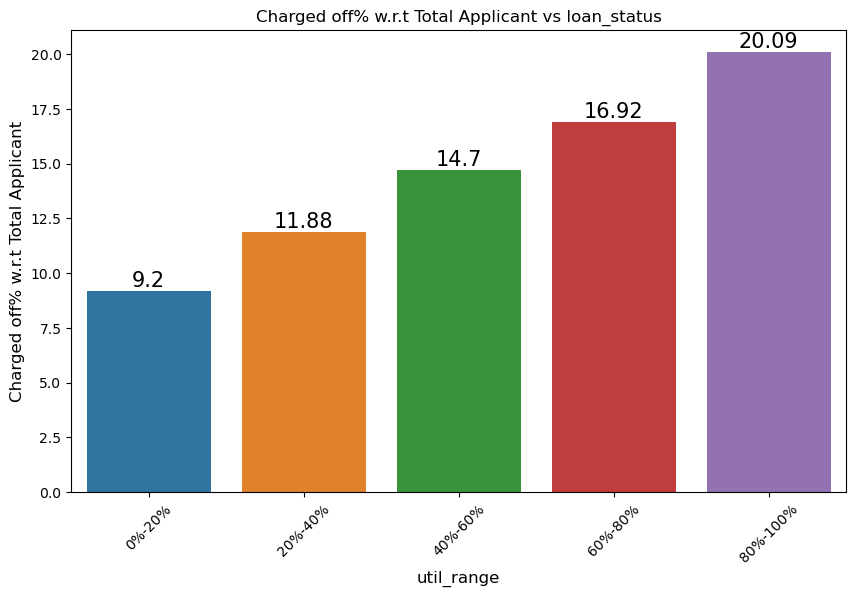

In [16]:
bins = [0, 20, 40, 60, 80, 100]
labels = ['0%-20%', '20%-40%', '40%-60%', '60%-80%', '80%-100%']
new_loan_df = loan_df.dropna(subset=['revol_util']).copy()
new_loan_df['util_range'] = pd.cut(new_loan_df['revol_util'],bins=bins,labels=labels)
plot_wrt_percentage(new_loan_df,'util_range','loan_status')

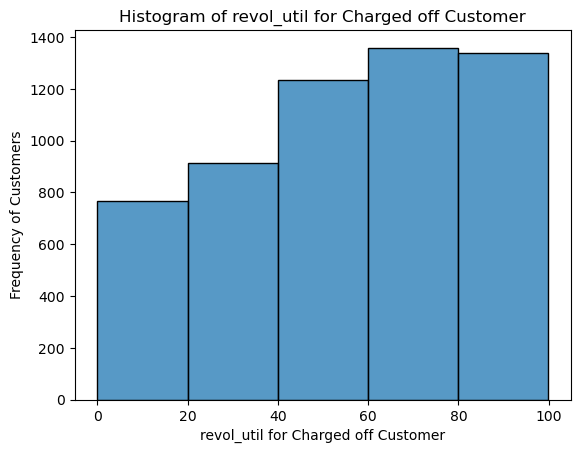

<Figure size 1000x600 with 0 Axes>

In [17]:
Charged_Off_df = loan_df[loan_df['loan_status']=='Charged Off']
Charged_Off_df['revol_util'].info
labels = ['5%-10%', '10%-15%', '15%-20%', '20%-25%']
sns.histplot(Charged_Off_df['revol_util'], bins=5)
plt.title('Histogram of revol_util for Charged off Customer')
plt.xlabel('revol_util for Charged off Customer')
plt.ylabel('Frequency of Customers')
figsize = (10, 6)
plt.figure(figsize=figsize)
plt.show()

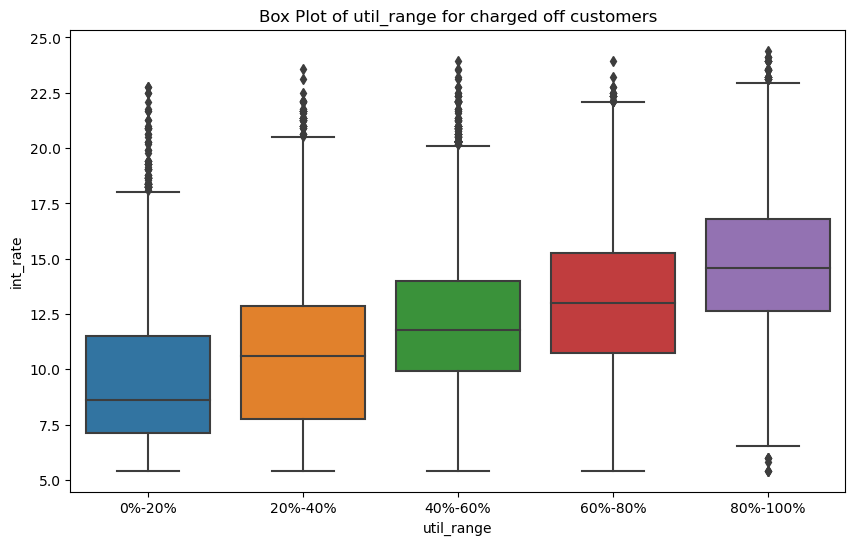

In [18]:
plt.figure(figsize=(10, 6))  # Set the figure size before creating the plot
sns.boxplot(x='util_range', y='int_rate', data=new_loan_df)
plt.title('Box Plot of util_range for charged off customers')
plt.show()

### Conclusion

1. The charged off % increases with increasing utilization range. 
2. The higher the utilization percentage the frequency of getting charged off increases.
3. Thus, we can say that the higher the credit utilization percentage higher the risk
4. The applicants with higher credit utilization have higher interest rates at which the loan is given



## Comparison b/w 'int_rate' and 'loan_status'

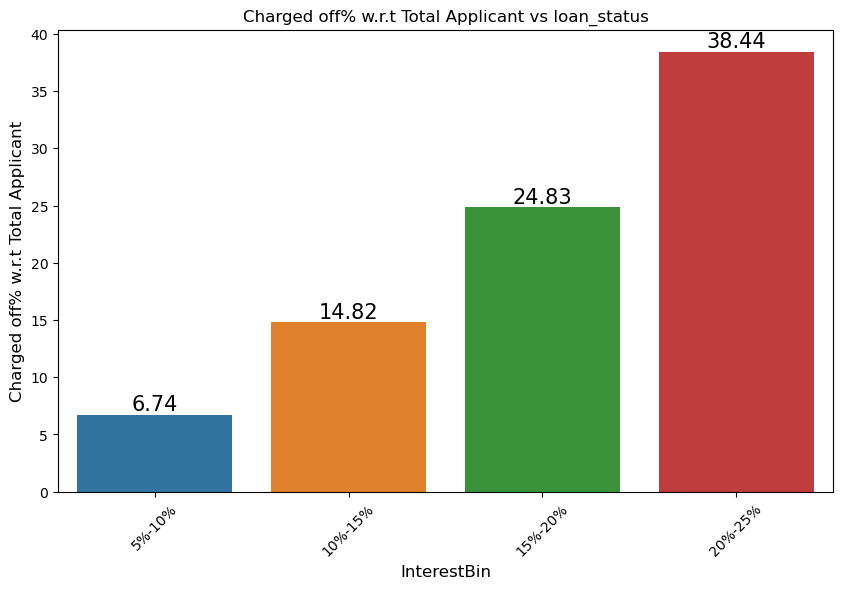

In [19]:
bins = [5, 10, 15, 20, 25]
labels = ['5%-10%', '10%-15%', '15%-20%', '20%-25%']
loan_df['InterestBin'] = pd.cut(loan_df['int_rate'],bins=bins,labels=labels)
figsize = (10, 6)
plot_wrt_percentage(loan_df,'InterestBin','loan_status',figsize)

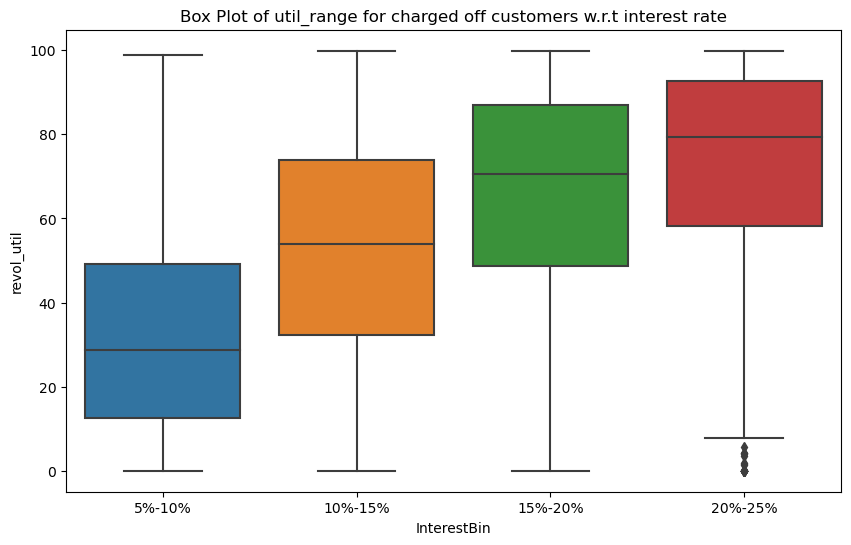

In [20]:
plt.figure(figsize=(10, 6))  # Set the figure size before creating the plot
sns.boxplot(x='InterestBin', y='revol_util', data=loan_df)
plt.title('Box Plot of util_range for charged off customers w.r.t interest rate')
plt.show()

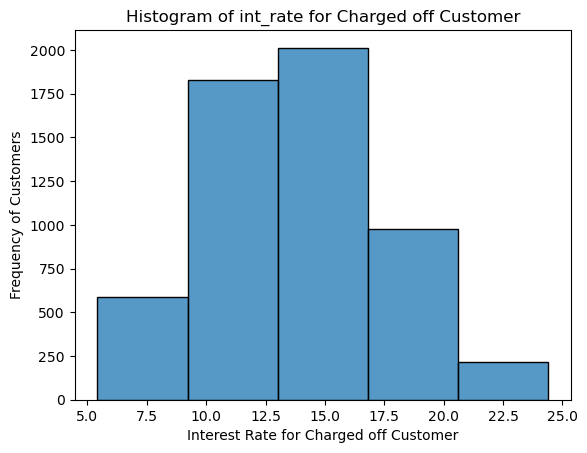

<Figure size 1000x600 with 0 Axes>

In [21]:
Charged_Off_df = loan_df[loan_df['loan_status']=='Charged Off']
Charged_Off_df['int_rate'].info
sns.histplot(Charged_Off_df['int_rate'], bins=5)
plt.title('Histogram of int_rate for Charged off Customer')
plt.xlabel('Interest Rate for Charged off Customer')
plt.ylabel('Frequency of Customers')
figsize = (10, 6)
plt.figure(figsize=figsize)
plt.show()

### Conclusion
1. The charged-off % increases with increasing interest rates. 
2. The higher charged-off frequency is for the range b/w 12.5% – 17.5% interest rate
3. Thus, we can say that the people with higher interest rates have been charged-off more.
4. The most charged off employees are concentrated b/w 11%-16% 


## Comparison b/w 'Grade of applicant' and 'loan_status'

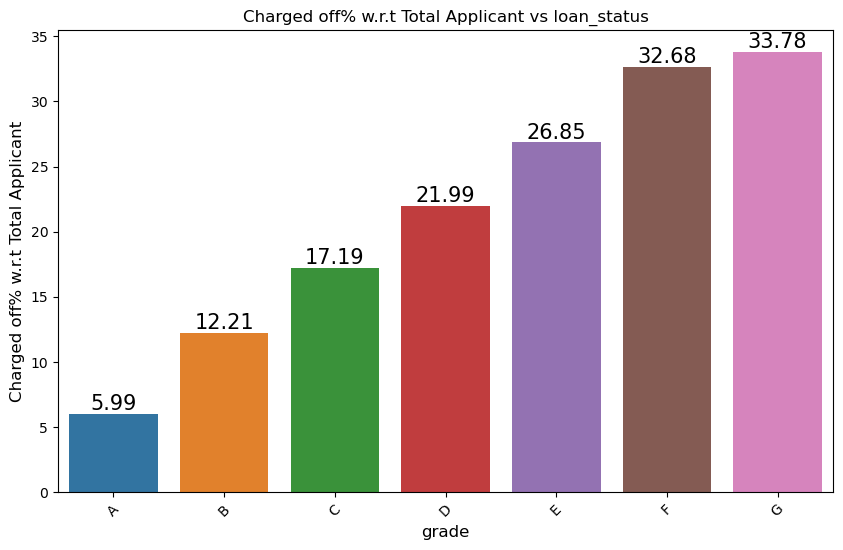

In [22]:
plot_wrt_percentage(loan_df,'grade','loan_status',figsize=(10, 6))

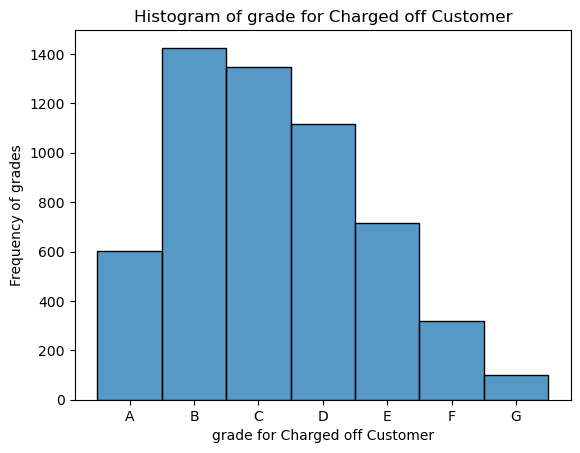

<Figure size 1000x600 with 0 Axes>

In [23]:
Charged_Off_df = loan_df[loan_df['loan_status']=='Charged Off']
Charged_Off_df = Charged_Off_df.sort_values('grade')
sns.histplot(Charged_Off_df['grade'])
plt.title('Histogram of grade for Charged off Customer')
plt.xlabel('grade for Charged off Customer')
plt.ylabel('Frequency of grades')
figsize = (10, 6)
plt.figure(figsize=figsize)
plt.show()

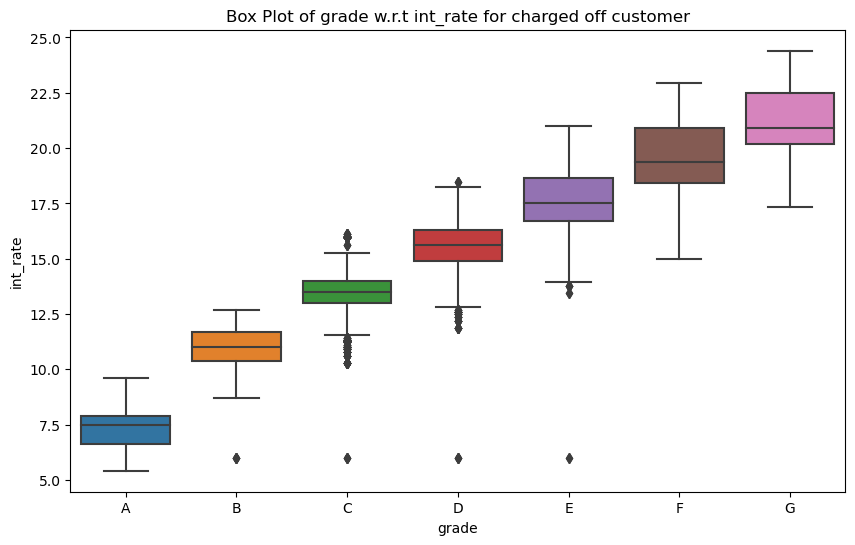

In [24]:
plt.figure(figsize=(10, 6))  # Set the figure size before creating the plot
sns.boxplot(x='grade', y='int_rate', data=loan_df.sort_values('grade'))
plt.title('Box Plot of grade w.r.t int_rate for charged off customer')
plt.show()

### Conclusion
1. The higher the grade of the applicant higher the chance of being charged off
2. But the frequency of applicant is the most for grade B, and least for grade G.
3. Thus, we can say that the applicant with higher grades has been charged-off more, but the frequency of such cases are less.
4. The interest rate increases with the increasing grade.
5. There are few outliers too.

In [25]:
loan_df.shape

(38577, 33)

## Comparison b/w Loan repayment term

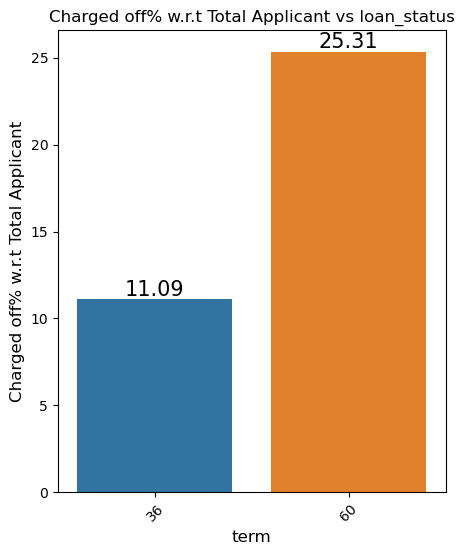

In [26]:
plot_wrt_percentage(loan_df,'term','loan_status',figsize=(5, 6))

Text(0, 0.5, 'Loan Application Count')

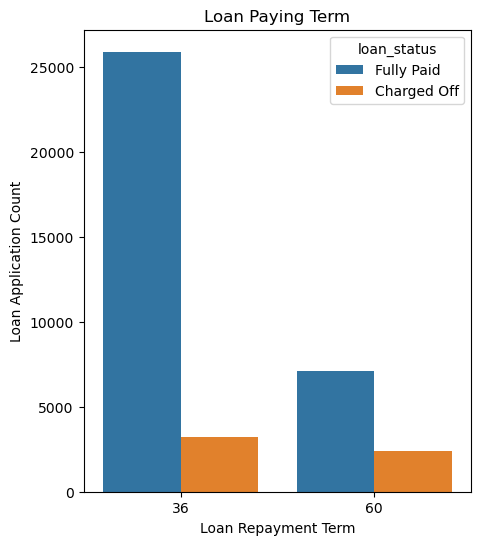

In [27]:
plt.figure(figsize=(5,6))
ax = sns.countplot(x="term",data=loan_df,hue='loan_status')
ax.set_title('Loan Paying Term')
ax.set_xlabel('Loan Repayment Term')
ax.set_ylabel('Loan Application Count')

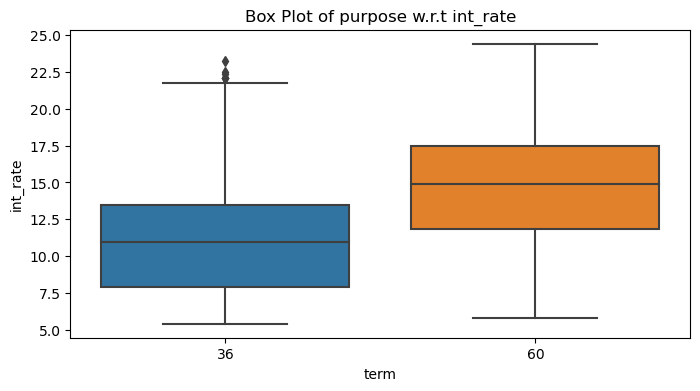

In [28]:
plt.figure(figsize=(8, 4))  # Set the figure size before creating the plot
sns.boxplot(x='term', y='int_rate', data=loan_df.sort_values('purpose'))
plt.title('Box Plot of purpose w.r.t int_rate')
plt.show()

### Conclusion
1. The charged-off % is higher for the 60-month term plan
2. The interest rate is also higher with the 60-month term plan. 
3. The median of the interest rate for the 60-month term plan is higher than the 75th percentile of the 36-month plant
4. More people have opted for the 36-month plan thus it is the more obvious choice. 

## Comparison b/w Loan purpose & Loan Status

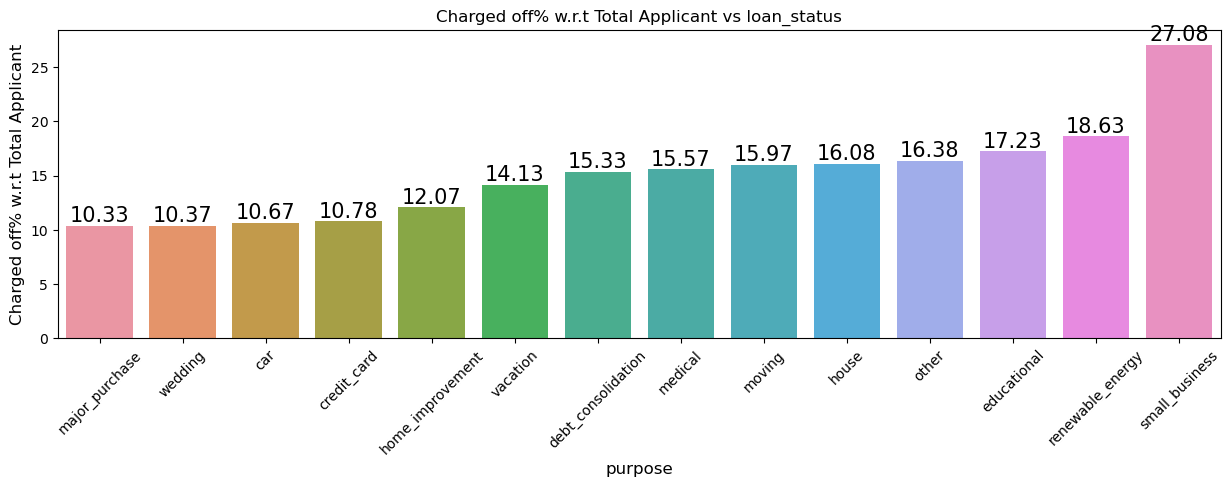

In [29]:
plot_wrt_percentage(loan_df,'purpose','loan_status',figsize=(15, 4))

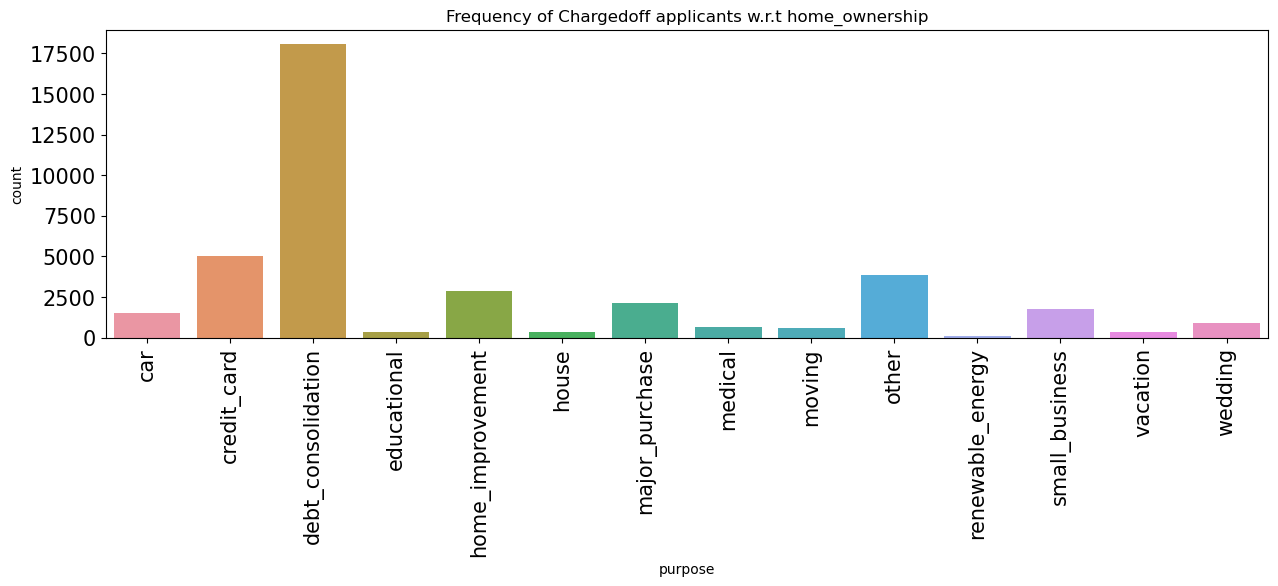

In [30]:
plt.figure(figsize=(15, 4))  # Set the figure size before creating the plot
sns.countplot(x='purpose',data=loan_df.sort_values("purpose"))
plt.title('Frequency of Chargedoff applicants w.r.t home_ownership')
plt.xticks(rotation=90,fontsize =15)
plt.yticks(fontsize =15)
plt.show()

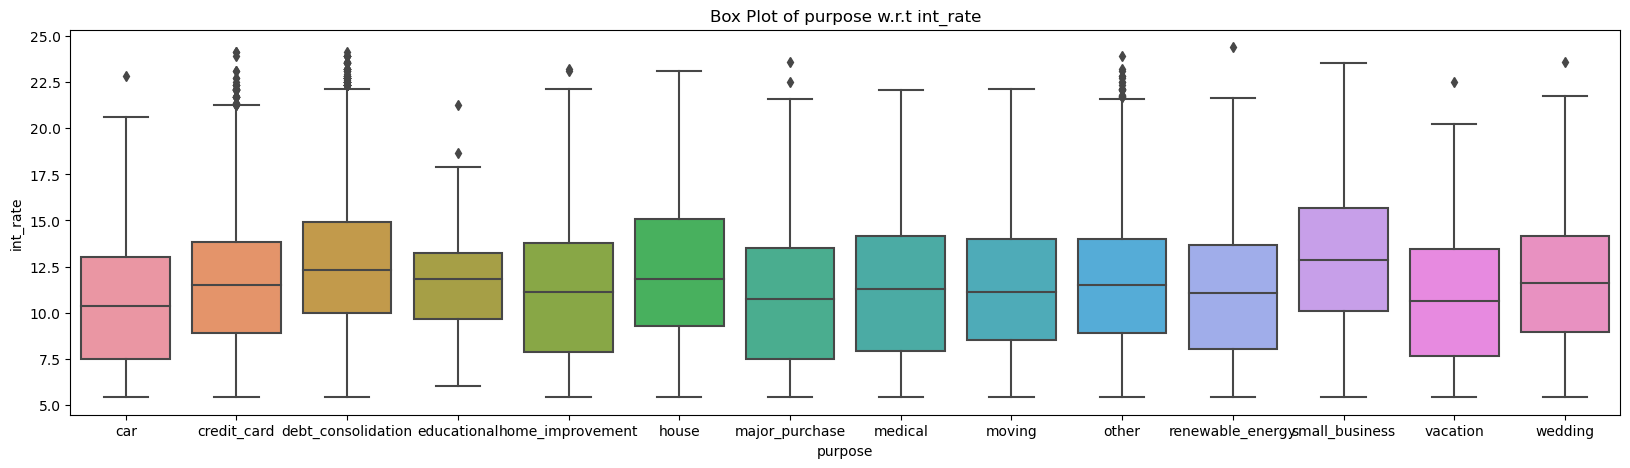

In [31]:
plt.figure(figsize=(20, 5))  # Set the figure size before creating the plot
sns.boxplot(x='purpose', y='int_rate', data=loan_df.sort_values('purpose'))
plt.title('Box Plot of purpose w.r.t int_rate')
plt.show()

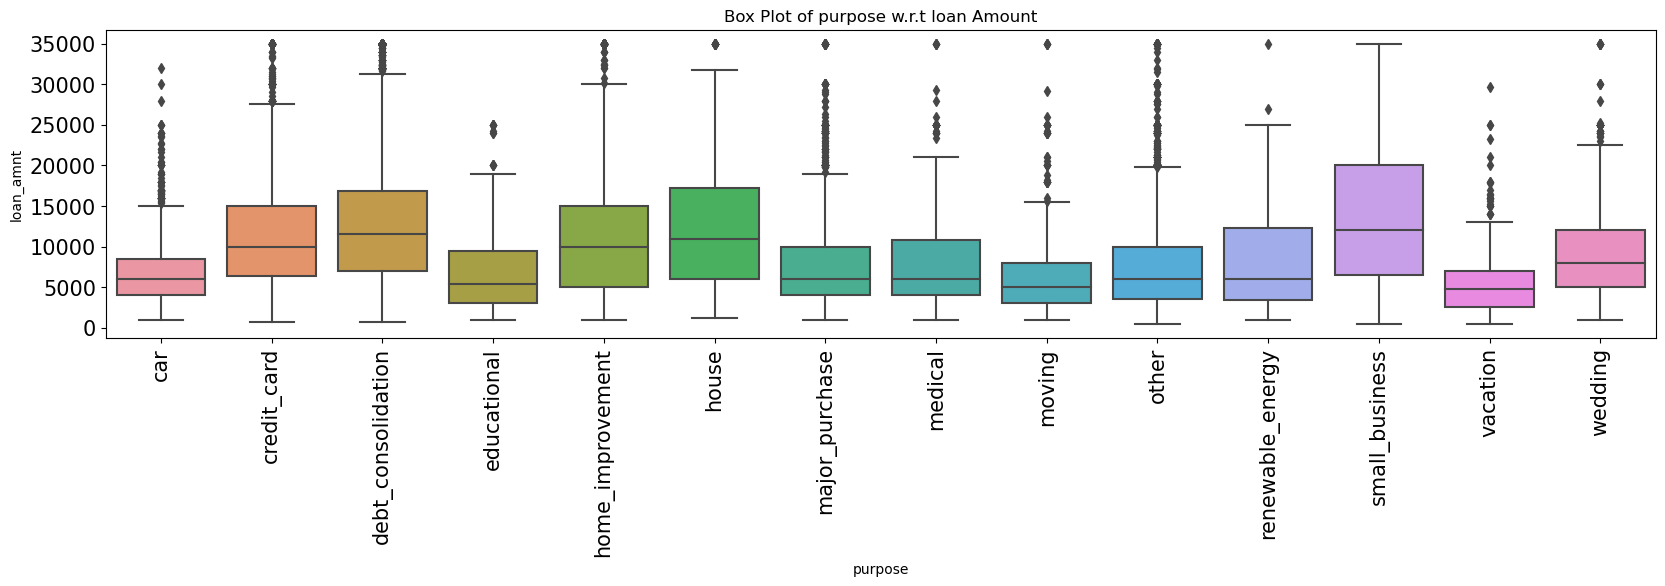

In [32]:
plt.figure(figsize=(20, 4))  # Set the figure size before creating the plot
sns.boxplot(x='purpose', y='loan_amnt', data=loan.sort_values('purpose'))
plt.title('Box Plot of purpose w.r.t loan Amount')
plt.xticks(rotation=90,fontsize =15)
plt.yticks(fontsize =15)
plt.show()

### Conclusion

1. The charged-off % is the most for small business
2. It will be risky to give loans for small businesses
3. The median of the interest rate for the 60-month term plan is higher than the 75th percentile of the 36-month plant
4. More people have opted for the 36-month plan thus it is the more obvious choice. 


## Comparison b/w Region/state & loan Status

<Figure size 2000x600 with 0 Axes>

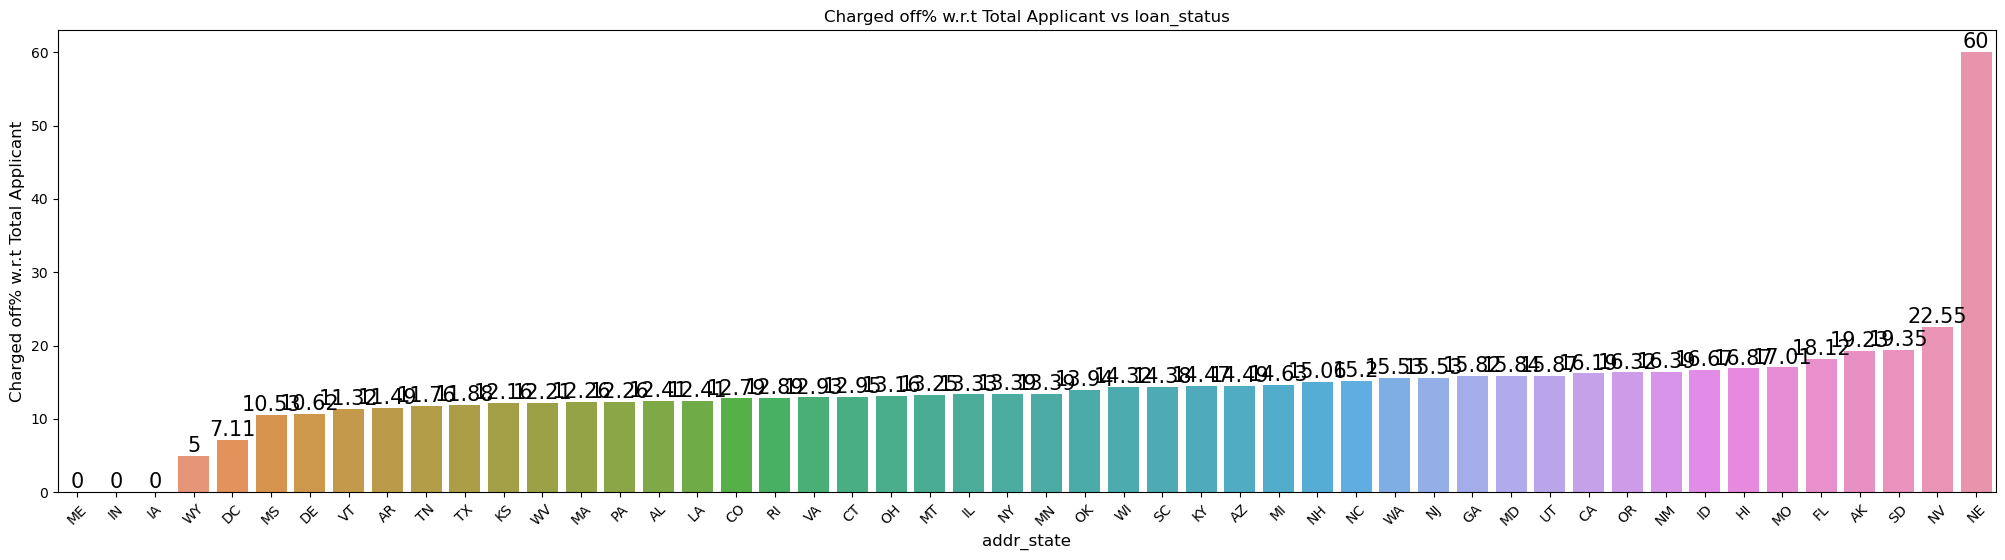

In [33]:
plt.figure(figsize=(20, 6))
loan_df = loan_df.sort_values('addr_state')
plot_wrt_percentage(loan_df.sort_values('addr_state'),'addr_state','loan_status',figsize=(25, 6))

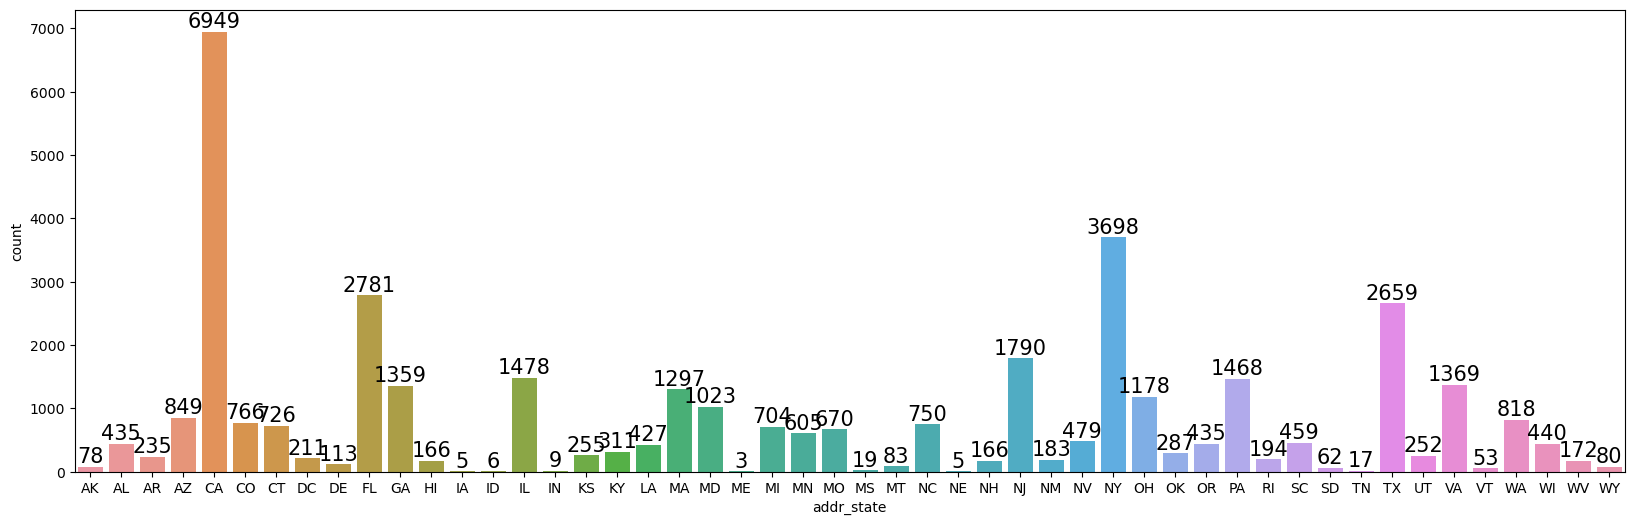

In [34]:
plt.figure(figsize=(20, 6))
ax = sns.countplot(x='addr_state', data=loan_df)
ax.bar_label(ax.containers[0],fontsize=15)
plt.show()


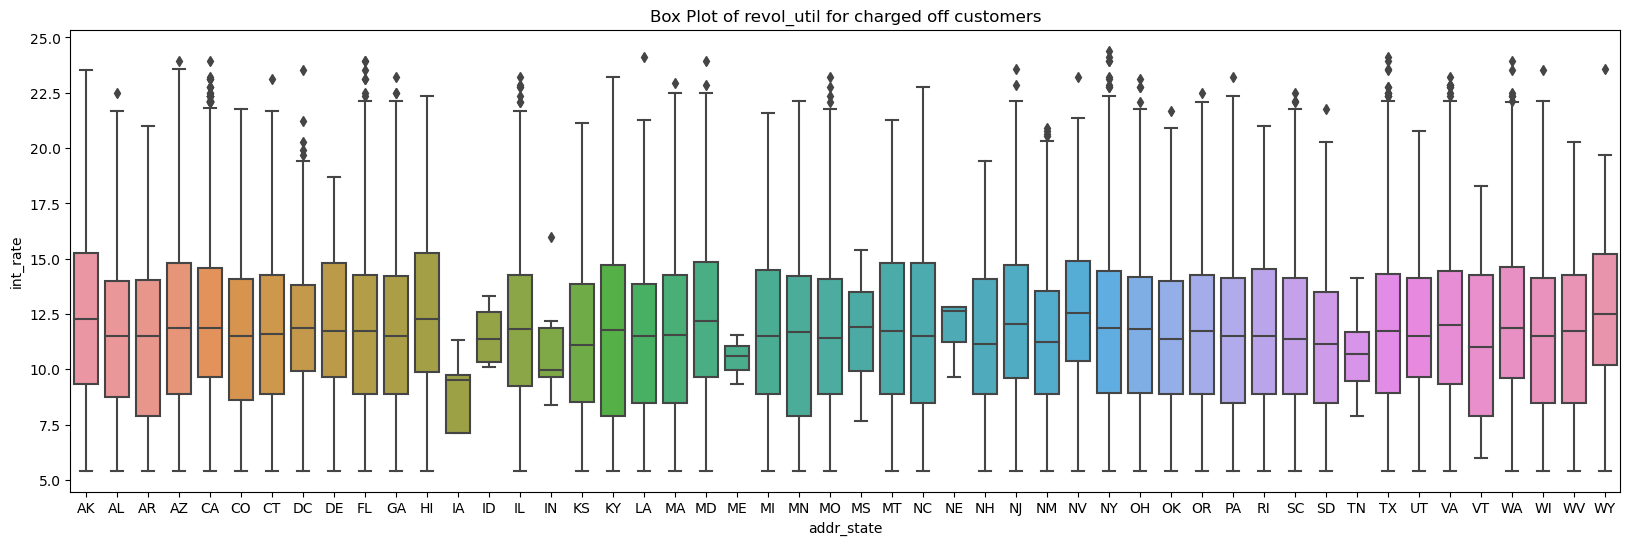

In [35]:
plt.figure(figsize=(20, 6))  # Set the figure size before creating the plot
sns.boxplot(x='addr_state', y='int_rate', data=loan_df)
plt.title('Box Plot of revol_util for charged off customers')
plt.show()

### Conclusion
1. From the chart 1, we can see that the charged-off percentage is highest for the address state “NE”.
2. From chart 2, we can see that most applicants stay in the address state “CA”.
3. This will help us filter out the applicants who are likely to be charged off based on the region of residence.


## Comparison b/w Home ownership & loan status

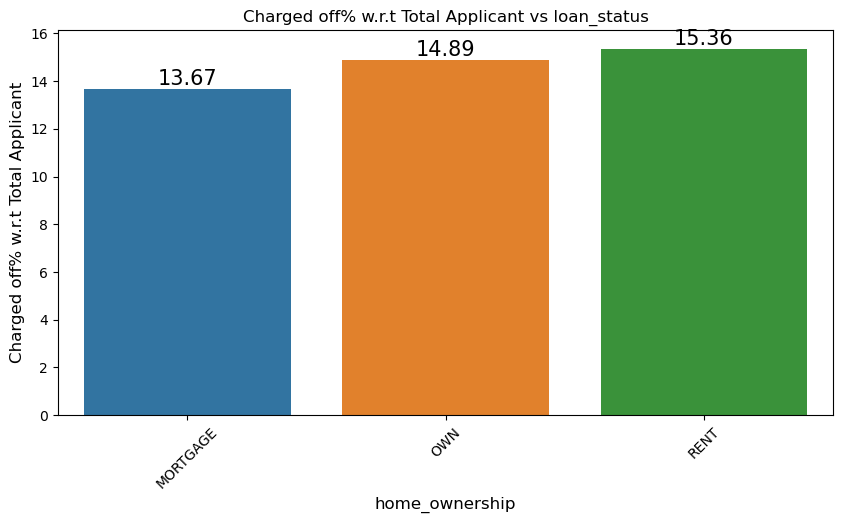

In [36]:
figsize = (10, 5)
plot_wrt_percentage(loan_df[(loan_df['home_ownership']!='NONE')&(loan_df['home_ownership']!='OTHER')],'home_ownership','loan_status',figsize)

### From the above charts  we can infer the following:
1. Increased likely-hood with Increasing utilization
2. People with high credit utilization are more likely to be defaulters when compared to people with lesser utilization.
3. People with utilization <30% can be our ideal customers
4. Frequency distrubtuion is highest for the people with highest utilization.
5. From the box plot we can see that the median is close to 60%.

## Univariate Analysis

In [37]:
# Create Bins for different the following groups

loan_df['open_acc_groups'] = pd.cut(loan_df['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
loan_df['total_acc_groups'] = pd.cut(loan_df['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
loan_df['annual_inc_groups'] = pd.cut(loan_df['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
loan_df['revol_util_groups'] = pd.cut(loan_df['revol_util'], bins=5, precision=0, labels=['0-20', '20-40', '40-60', '60-80', '80-100'])
loan_df['int_rate_groups'] = pd.cut(loan_df['int_rate'], bins=5, precision=0, labels=['5%-9%', '9%-13%', '13%-17%', '17%-21%', '21%-24%'])
loan_df['dti_group'] = pd.cut(loan_df['dti'], bins=5,precision=0, labels=['0%-6%', '6%-12%', '12%-18%', '18%-24%', '24%-30%'])

<Axes: xlabel='int_rate_groups', ylabel='count'>

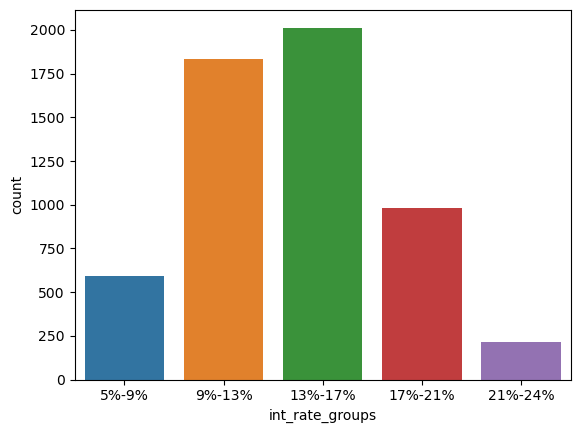

In [38]:
sns.countplot(x='int_rate_groups', data=loan_df[loan_df.loan_status == 'Charged Off'])

<Axes: xlabel='revol_util_groups', ylabel='count'>

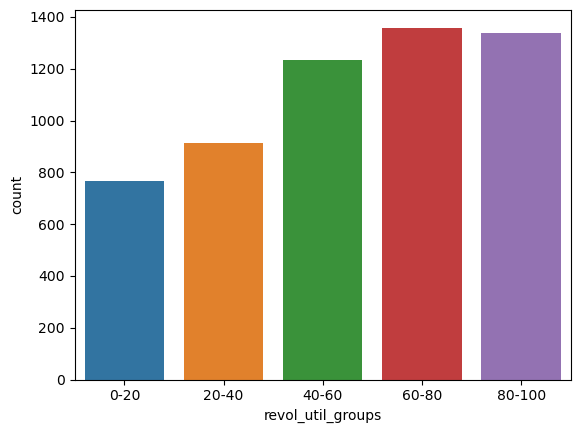

In [39]:
sns.countplot(x='revol_util_groups', data=loan_df[loan_df.loan_status == 'Charged Off'])

<Axes: xlabel='open_acc_groups', ylabel='count'>

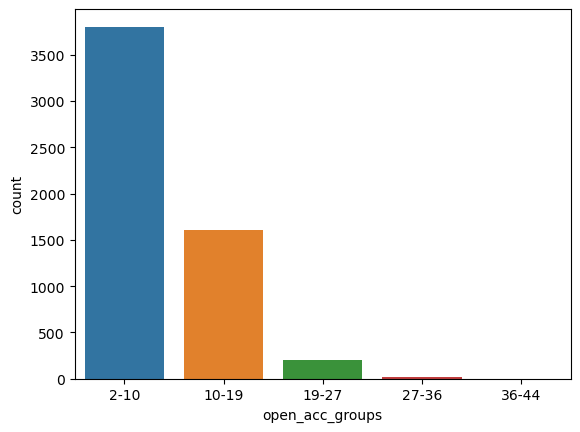

In [40]:
sns.countplot(x='open_acc_groups', data=loan_df[loan_df.loan_status == 'Charged Off'])

<Axes: xlabel='total_acc_groups', ylabel='count'>

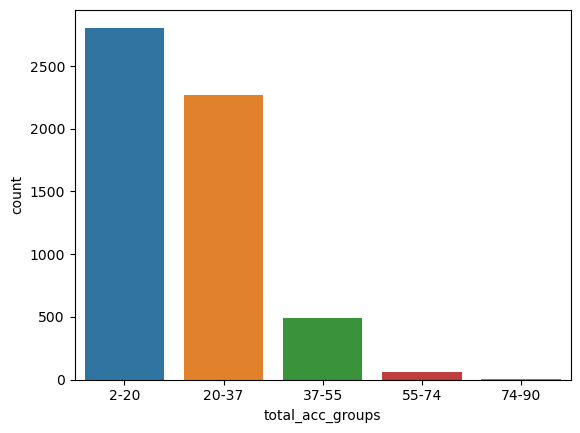

In [41]:
sns.countplot(x='total_acc_groups', data=loan_df[loan_df.loan_status == 'Charged Off'])

<Axes: xlabel='annual_inc_groups', ylabel='count'>

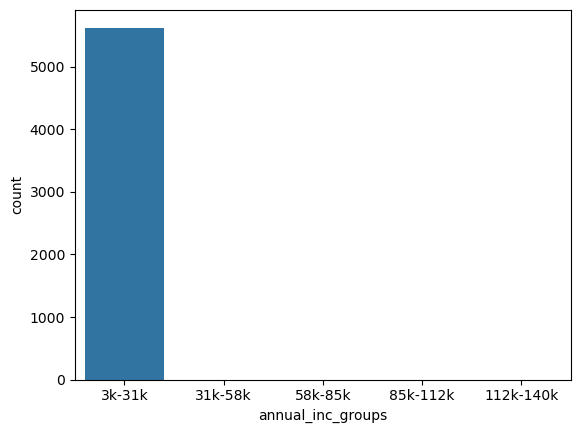

In [42]:
sns.countplot(x='annual_inc_groups', data=loan_df[loan_df.loan_status == 'Charged Off'])

<Axes: xlabel='inq_last_6mths', ylabel='count'>

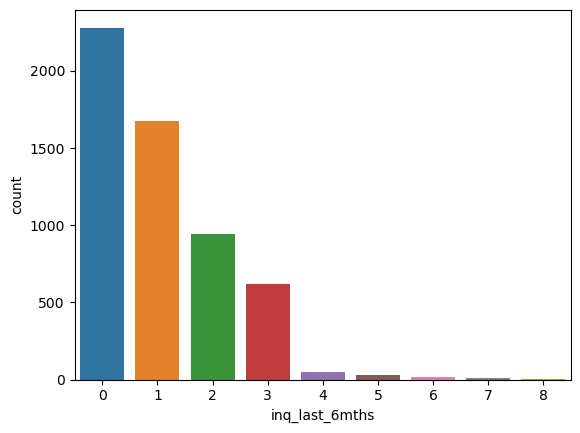

In [43]:
sns.countplot(x='inq_last_6mths', data=loan_df[loan_df['loan_status']=='Charged Off'])

<Axes: xlabel='issue_year', ylabel='count'>

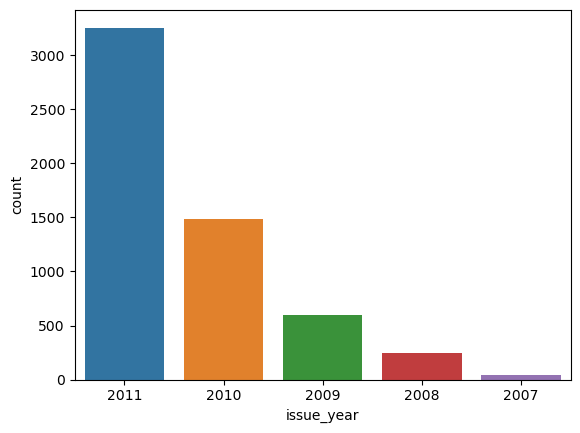

In [44]:
sns.countplot(x='issue_year', data=loan[loan['loan_status']=='Charged Off'])
# Maximum number of defaults occured when the loan was sanctioned/issued in Dec.
# Loan issued in the year 2011 were also as compared to other years

In [45]:
loan['installment_groups'] = pd.cut(loan['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
loan['funded_amnt_inv_group'] = pd.cut(loan['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan['loan_amnt_groups'] = pd.cut(loan['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan['dti_groups'] = pd.cut(loan['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

<Axes: xlabel='funded_amnt_inv_group', ylabel='count'>

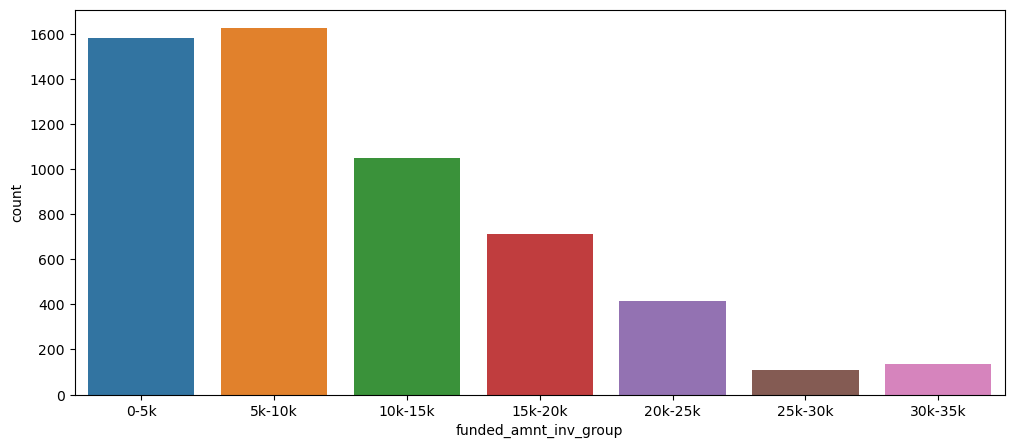

In [46]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.countplot(x='funded_amnt_inv_group', data=loan[loan['loan_status']=='Charged Off'])
# Its observe less amount committed by investors for that loan at that point in time more likely to charged off

<Axes: xlabel='loan_amnt_groups', ylabel='count'>

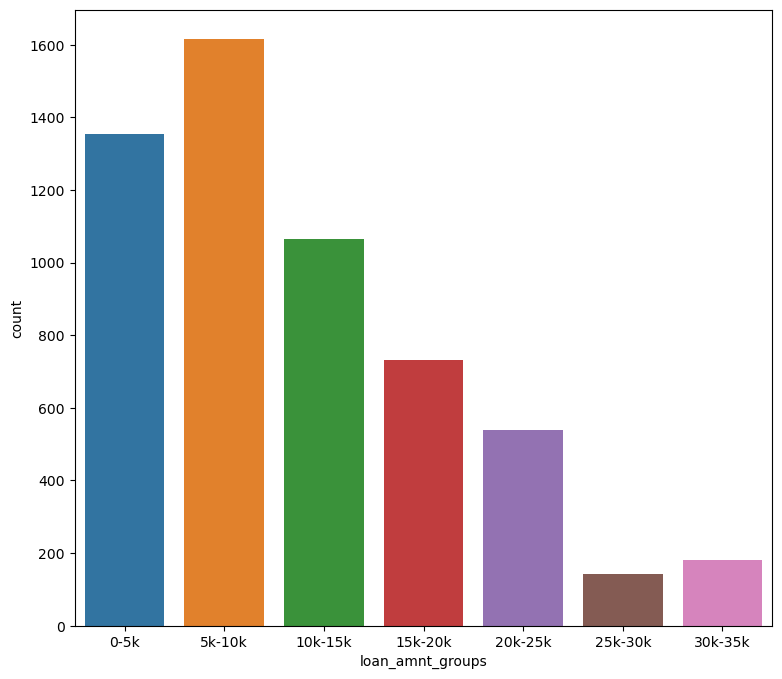

In [47]:
fig, ax = plt.subplots(figsize=(9, 8))
sns.countplot(x='loan_amnt_groups', data=loan[loan['loan_status']=='Charged Off'])
# its observe LOAN Amt between 5k-10k most likely to charged off

<Axes: xlabel='dti_groups', ylabel='count'>

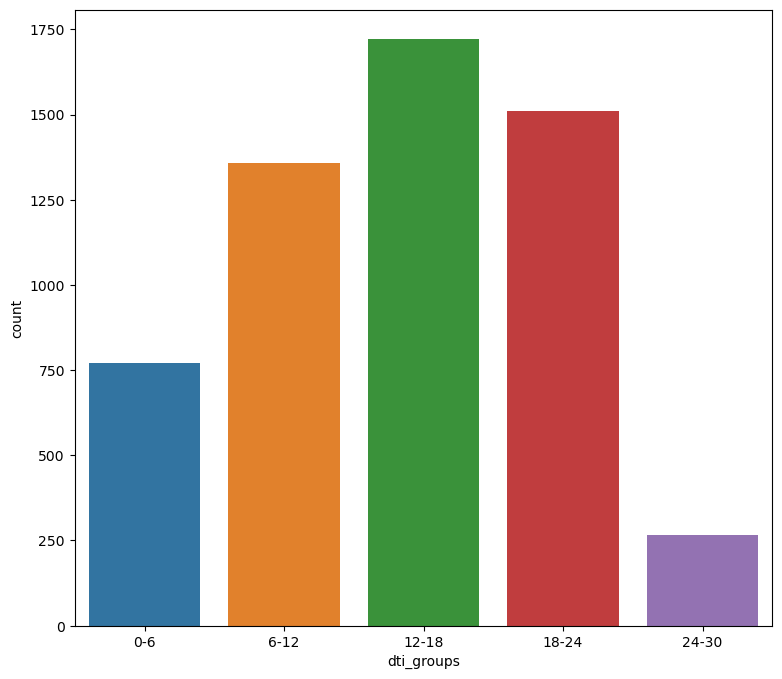

In [48]:
fig, ax = plt.subplots(figsize=(9, 8))
sns.countplot(x='dti_groups', data=loan[loan['loan_status']=='Charged Off'])
# its observe dti between 12k-8k most likely to charged off

<Axes: xlabel='installment_groups', ylabel='count'>

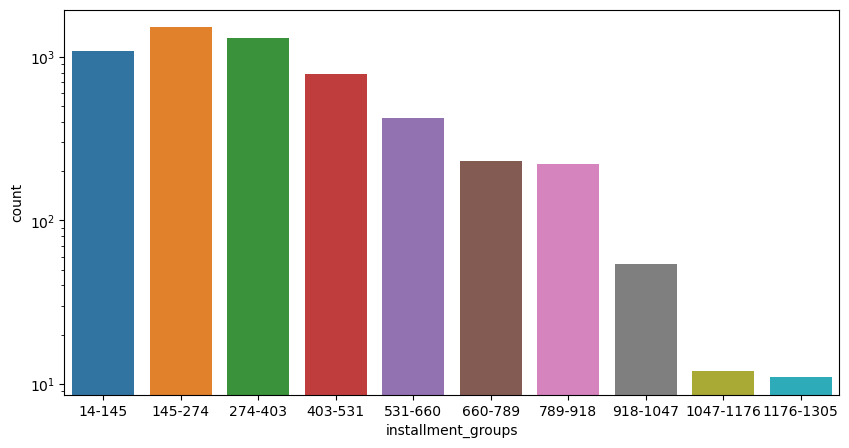

In [49]:
fig,ax = plt.subplots(figsize = (10,5))
ax.set_yscale('log')
sns.countplot(x='installment_groups', data=loan[loan['loan_status']=='Charged Off'])


C:\Users\21985\AppData\Local\Temp\ipykernel_25860\3845608682.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = loan[['loan_amnt','funded_amnt_inv','revol_util','open_acc','int_rate','installment','annual_inc','dti','pub_rec']].corr()


<Axes: >

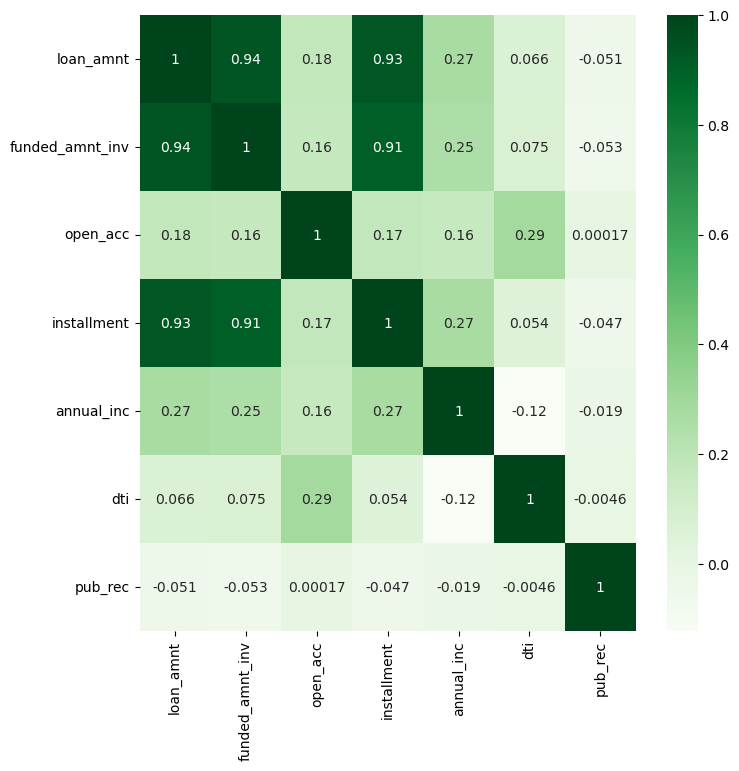

In [50]:
f,ax = plt.subplots(figsize= (8,8))
correlation_matrix = loan[['loan_amnt','funded_amnt_inv','revol_util','open_acc','int_rate','installment','annual_inc','dti','pub_rec']].corr()
sns.heatmap(correlation_matrix,xticklabels = correlation_matrix.columns.values,yticklabels= correlation_matrix.columns.values,cmap= 'Greens', annot=True)

# Observation
# Loan amount, investor amount, funding amount are strongly correlated.
# Annual income with DTI(Debt-to-income ratio) is negatively correalated.
# annual income is low DTI is high & vice versa.
# annual income and employment year correlation positive observe
# That means income increases with work experience


Text(0, 0.5, 'Loan Application Count')

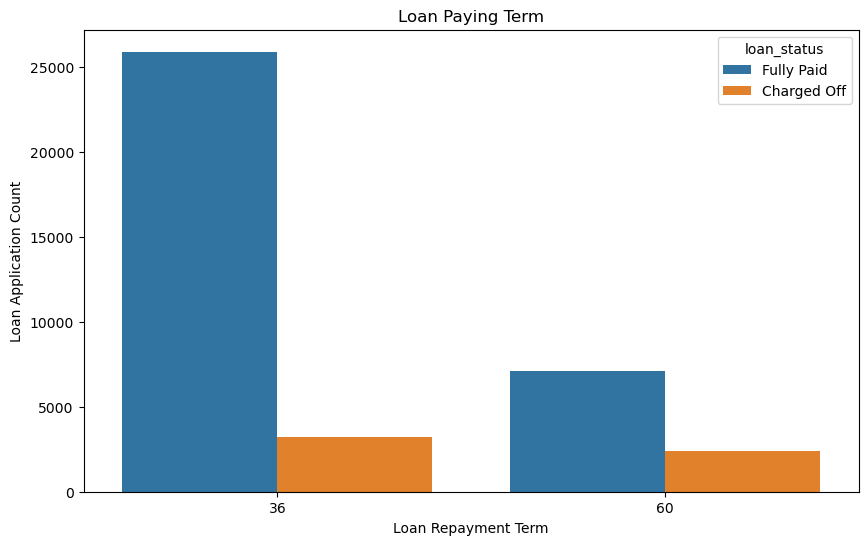

In [51]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x="term",data=loan_df,hue='loan_status')
ax.set_title('Loan Paying Term')
ax.set_xlabel('Loan Repayment Term')
ax.set_ylabel('Loan Application Count')

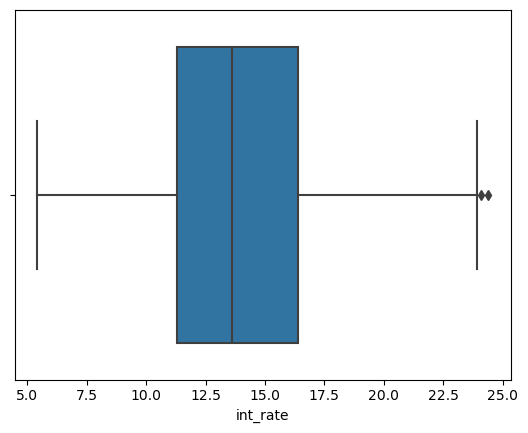

In [52]:
 
sns.boxplot(x=Charged_Off_df['int_rate'])
plt.show()

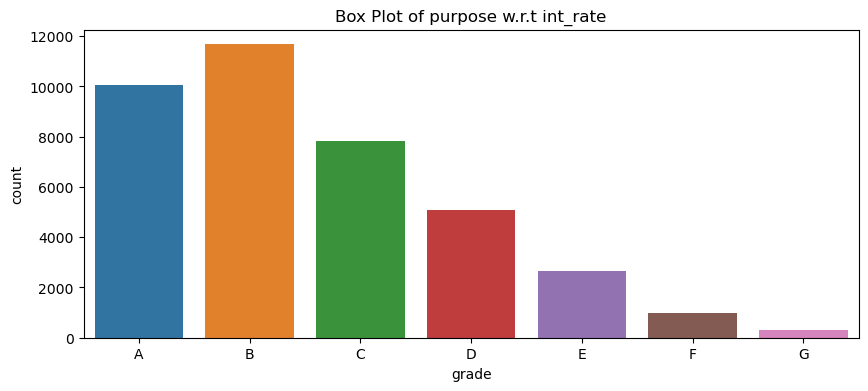

In [53]:
plt.figure(figsize=(10, 4))  # Set the figure size before creating the plot
sns.countplot(x='grade',data=loan_df.sort_values("grade"))
plt.title('Box Plot of purpose w.r.t int_rate')
plt.show()

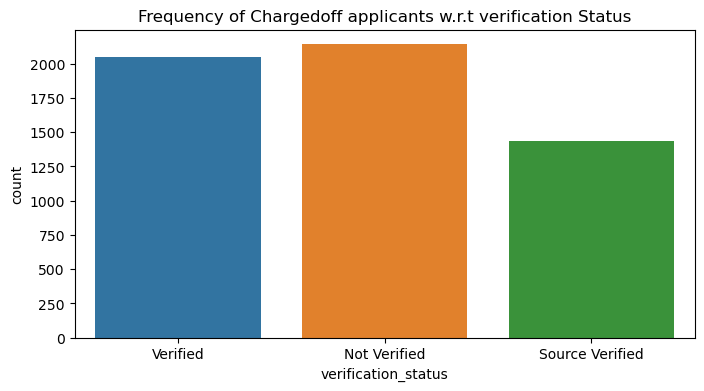

In [54]:
plt.figure(figsize=(8, 4))  # Set the figure size before creating the plot
sns.countplot(x='verification_status',data=Charged_Off_df.sort_values("home_ownership"))
plt.title('Frequency of Chargedoff applicants w.r.t verification Status')
plt.show()

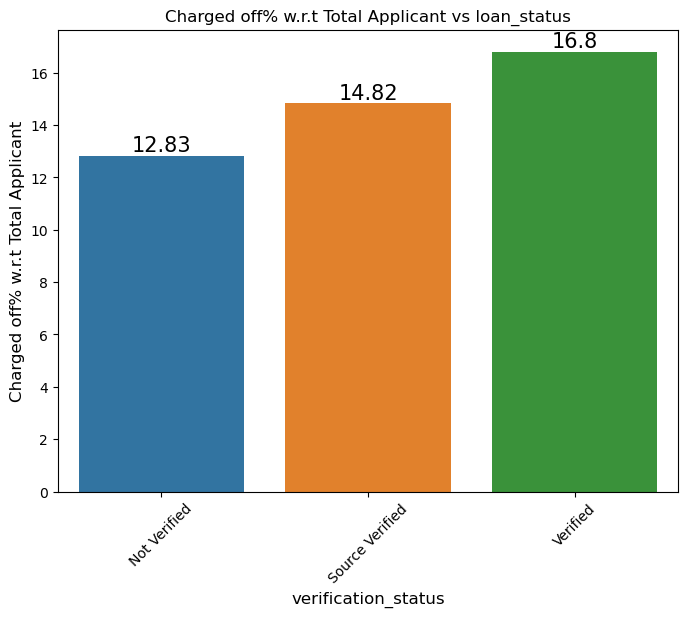

In [55]:
plot_wrt_percentage(loan_df,'verification_status','loan_status',figsize=(8, 6))

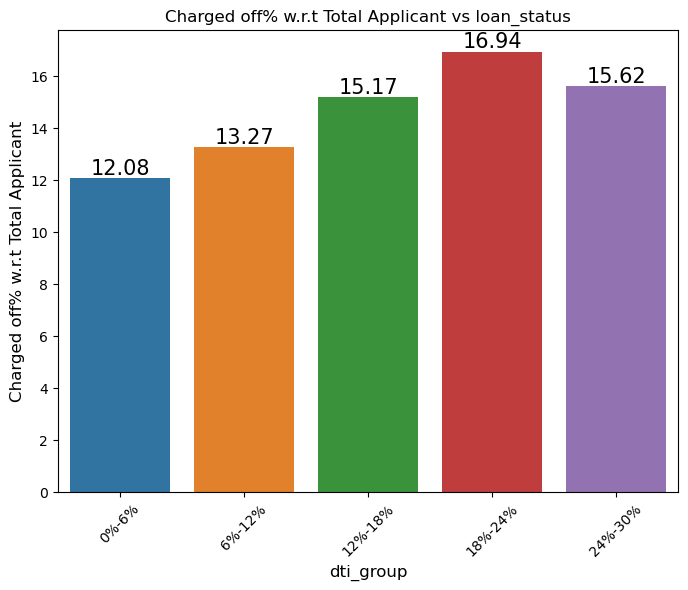

In [56]:
plot_wrt_percentage(loan_df,'dti_group','loan_status',figsize=(8, 6))

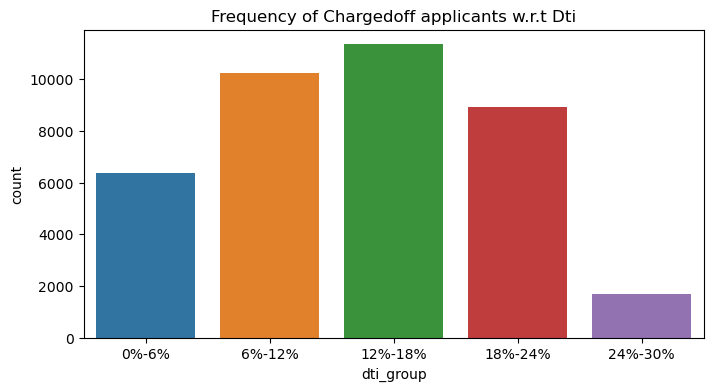

In [57]:
plt.figure(figsize=(8, 4))  # Set the figure size before creating the plot
sns.countplot(x='dti_group',data=loan_df.sort_values("home_ownership"))
plt.title('Frequency of Chargedoff applicants w.r.t Dti')
plt.show()

# Conclusion
1. Feature Matrix
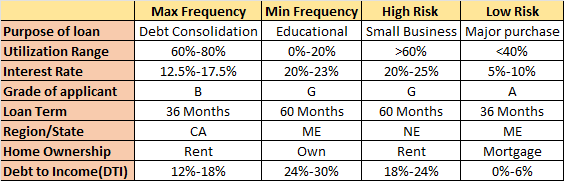

1. Lending clubs should reduce the high interest loans for 60 months tenure, they are prone to loan default.
2. Grades are a good metric for detecting defaulters. 
3. People in G grade are more at high risk but are lower in numbers
4. The Lending Club should control the number of loans issued to borrowers who are from CA, FL and NY to make profits.
5. People with high credit utilization are more likely to be defaulters when compared to people with lesser utilization.
6. People with utilization <30% can be our ideal customers
7. Small business loans are defaulted more and have higher interest on loans.
8. The lending club should reduce issuing loans to them.
9. Borrowers with mortgage homeownership are taking higher loans and defaulting on the approved loans.
10. The lending club should stop giving loans to this category when the loan amount requested is more than 12000..

# Recommendation
1. Lower credit utilization can be given loans at lower interest rates
2. People with DTI in the range 0%-6% can be given the loan
3. People in A & B grades are at low risk and have high numbers too
4. Credit card and debt consolidation have relatively lower chances of being charged off and are in high frequency, Thus can be targeted.

